In [58]:
grid =  [0,-1,-1,-1]  + \
        [-1,-1,-1,-1] + \
        [-1,-1,-1,-1] + \
        [-1,-1,-1,0]
grid

[0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 0]

In [22]:
import matplotlib.pyplot as plt
import numpy as np

In [67]:
def drawGrid(grid,title):
    size_l = int(np.sqrt(len(grid)))
    plt.figure(figsize=(4,4))
    plt.ylim(0,size_l)
    plt.xlim(0,size_l)
    plt.xticks(range(size_l))
    plt.yticks(range(size_l))
    plt.rc('grid', linestyle="-", color='black')
    plt.title(title)
    for x in range(size_l):
        for y in range(size_l):
            plt.text((x)+0.5,(size_l-1-y)+0.5,grid[x + size_l *y], ha="center", va="center")
        
    plt.grid(True)
    plt.show()

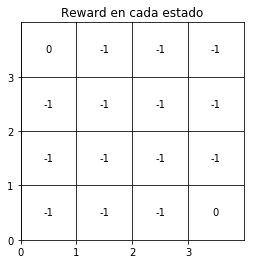

In [68]:
drawGrid(grid,"Reward en cada estado")

In [72]:
num_states = 16
states = list(range(16))
states[0]="inicio"
states[15]="fin"

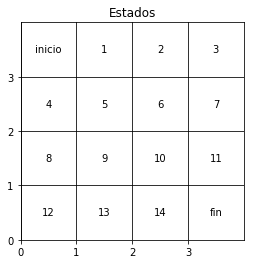

In [73]:
drawGrid(states,"Estados")

In [504]:
actions = ["arriba","abajo","derecha","izquierda"]
states = range(num_states)
action_value = {state:{action:0 for action in actions} for state in states}

In [505]:
def printPolicy(action_value):
    simbols = list(range(num_states))
    for x,value in enumerate(action_value):
        simbols[x] = ""
        if((x != 0) & (x!= 15) ):
            max_p = max(action_value[x].values())
            if(action_value[x]["arriba"] == max_p):
                simbols[x]= simbols[x]+"↑"
            if(action_value[x]["abajo"] == max_p):
                simbols[x]= simbols[x]+"↓"
            if(action_value[x]["izquierda"] == max_p):
                simbols[x]= simbols[x]+"←"
            if(action_value[x]["derecha"] == max_p):
                simbols[x]= simbols[x]+"→"
    drawGrid(simbols,"Action value 0")
    

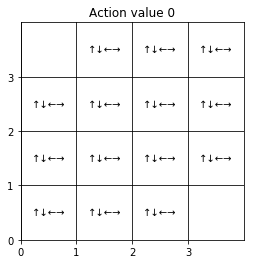

In [506]:
printPolicy(action_value=action_value)

In [507]:
import random
gamma = 0.1
beta=0.7
epsilon = 0.1
def get_action_e_greedy(state):
    
    x = state%4
    y = int(np.floor(state/4))
    actions_ava = action_value[state].keys()
    
    if(x == 0):
        actions_ava = actions_ava - set(["izquierda"])
        action_value[state]["izquierda"] = action_value[state]["izquierda"] -1
    if(x == 3):
        actions_ava = actions_ava - set(["derecha"])
        action_value[state]["derecha"] = action_value[state]["derecha"] -1
    if(y == 0):
        actions_ava = actions_ava - set(["arriba"])
        action_value[state]["arriba"] = action_value[state]["arriba"] -1
    if(y == 3):
        actions_ava = actions_ava - set(["abajo"])
        action_value[state]["abajo"] = action_value[state]["abajo"] -1
        
    action_greedy = max(actions_ava ,key = lambda valor: action_value[state][valor])
    
    if random.random() <= epsilon:
        action_greedy = list(actions_ava - set(action_greedy))[random.randint(0,len(actions_ava) - 2 )]
    return action_greedy,action_value[state][action_greedy]
def getState(state,action):
    
    if(action == "arriba"):
        state = state - 4
    if(action == "abajo"):
        state = state + 4
    
    if(action == "izquierda"):
        state = state - 1
    if(action == "derecha"):
        state = state + 1
    return state    
            
def maxQas(state_apostrofe,state,action):
    return max([value - action_value[state]["arriba"] for value in action_value[state_apostrofe].values()])

In [514]:
state = 0
for i in range(10000):
    action,value = get_action_e_greedy(state)
    new_state = getState(state,action)
    residuo = maxQas(new_state,state,action)
    reward = grid[new_state]
    new_q = action_value[state][action] + beta*(reward+gamma*(residuo))
    action_value[state][action] = new_q
    state = new_state
    

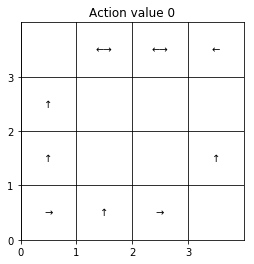

In [515]:
printPolicy(action_value=action_value)

In [516]:
action_value

{0: {'abajo': -1.5784632122227893,
  'arriba': -10117,
  'derecha': inf,
  'izquierda': -10117},
 1: {'abajo': nan, 'arriba': -11266, 'derecha': inf, 'izquierda': inf},
 2: {'abajo': nan, 'arriba': -4172, 'derecha': inf, 'izquierda': inf},
 3: {'abajo': -1.0499999999999998,
  'arriba': -3419,
  'derecha': -3419,
  'izquierda': inf},
 4: {'abajo': -0.749,
  'arriba': 13700581586.385859,
  'derecha': -1.44557,
  'izquierda': -11},
 5: {'abajo': -8.094411653153855e+258,
  'arriba': nan,
  'derecha': nan,
  'izquierda': -1.933832915084194},
 6: {'abajo': nan,
  'arriba': nan,
  'derecha': nan,
  'izquierda': 2.8137701968582643e+70},
 7: {'abajo': nan, 'arriba': nan, 'derecha': -13, 'izquierda': nan},
 8: {'abajo': -1.4066199,
  'arriba': -1.2034021992686779,
  'derecha': -1.3997598999999998,
  'izquierda': -7},
 9: {'abajo': -1.953,
  'arriba': nan,
  'derecha': -2.1344792584466536,
  'izquierda': -2.0086199},
 10: {'abajo': -2.525741869904399,
  'arriba': nan,
  'derecha': -2.619522938011

In [316]:
new_state

16